## Part 1: Visualize Daily Treasury Yield Curve Rates

### 1. Load Daily Treasury Yield Curve Rates as rates.csv file: Load into datafram; Use Date as index.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rates = pd.read_csv('Your file directory here - rates.csv', index_col='Date')

In [3]:
rates

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
1/2/19,2.40,2.40,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1/3/19,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
1/4/19,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
1/7/19,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
1/8/19,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
12/24/19,1.55,1.58,1.58,1.61,1.53,1.62,1.64,1.72,1.83,1.90,2.20,2.33
12/26/19,1.59,1.60,1.58,1.61,1.53,1.64,1.65,1.72,1.85,1.90,2.19,2.33
12/27/19,1.56,1.56,1.57,1.59,1.51,1.59,1.60,1.68,1.80,1.88,2.18,2.32


### 2. Plot curves on all columns in one graph, with x axis the count of date, y axis the rates. By visually inspecting the curves, which curve has the overall highest rate through out the year? Highlight that curve with red solid line, every other curves in dash line.

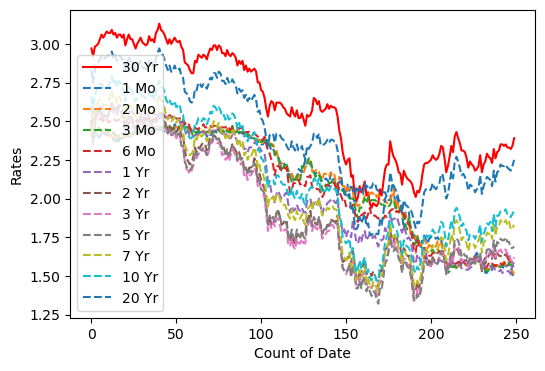

30 Yr curve has the overall highest rate


In [4]:
# X-axis: count of date
rates = rates.reset_index(drop=True)

# Calculate the mean, excluding 'Date' column
mean_rates = rates.mean(numeric_only=True)

# Find the column with the highest mean rate
highest_rate = mean_rates.idxmax()

plt.figure(figsize=(6, 4))

# Highest rate curve with a red solid line
plt.plot(rates.index, rates[highest_rate], color='red', linestyle='-', label=highest_rate)

# All other curves with dash lines
for column in mean_rates.index:
  if column != highest_rate:
    plt.plot(rates.index, rates[column], linestyle='--', label=column)

plt.xlabel('Count of Date')
plt.ylabel('Rates')
plt.legend()

plt.show()

print(f"{highest_rate} curve has the overall highest rate")

### 3. PairGrid all short rates (less than one year rate). You should get a 4x4 graph. Use histplot for diagonal plots, use scatter plot for upper corner, and regplot for lower corner.

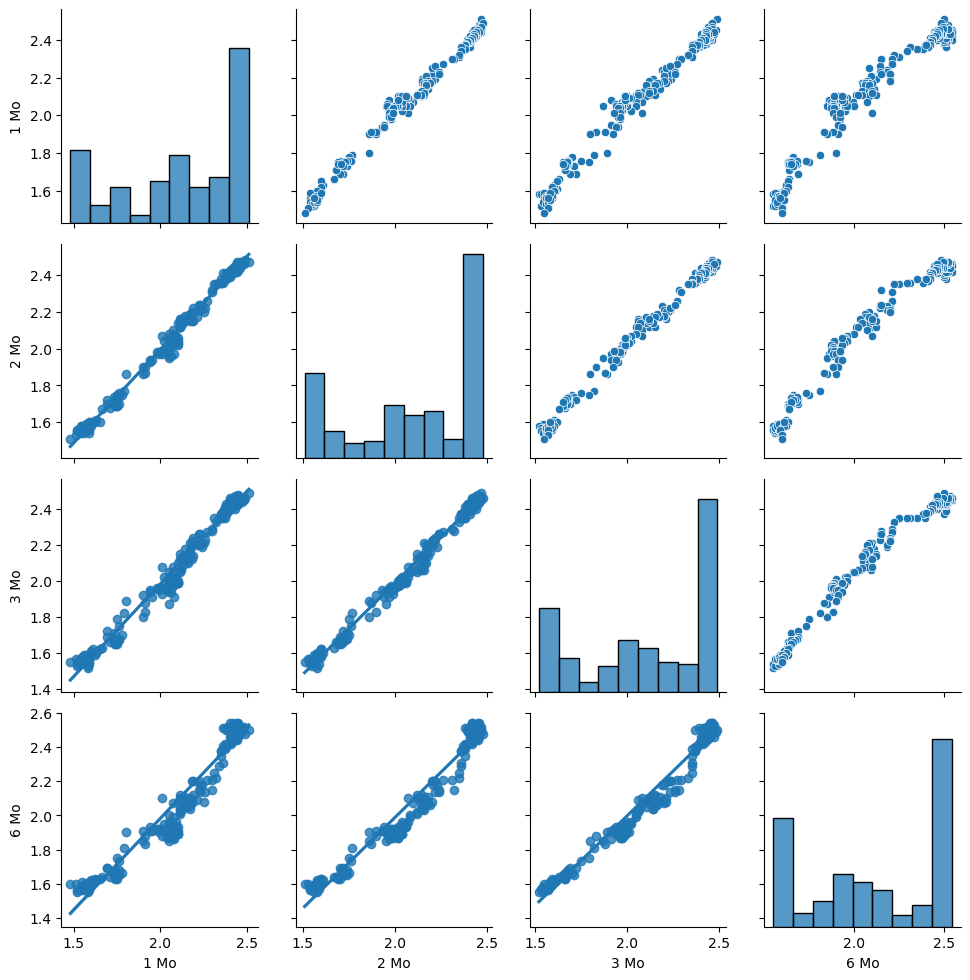

In [5]:
# Select the short rates (less than one year rate)
short_rates = rates[['1 Mo', '2 Mo', '3 Mo', '6 Mo']]

# PairGrid
g = sns.PairGrid(short_rates)

# Dia = histplot; upper = scatterplot, lower = regplot
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.regplot)

plt.show()

### 4. "reg" jointplot 2m and 3m rates.

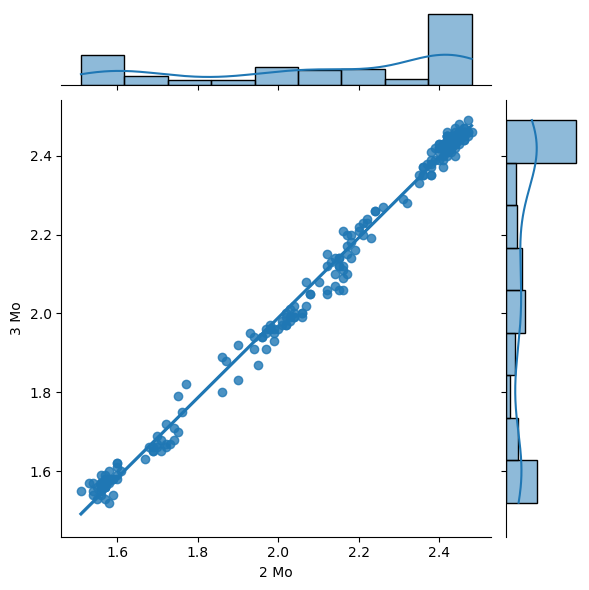

In [6]:
# Jointplot of 2MO and 3Mo
sns.jointplot(data=rates, x='2 Mo', y='3 Mo', kind='reg')

plt.show()

### 5. Use heatmap to show the correlations between each column.

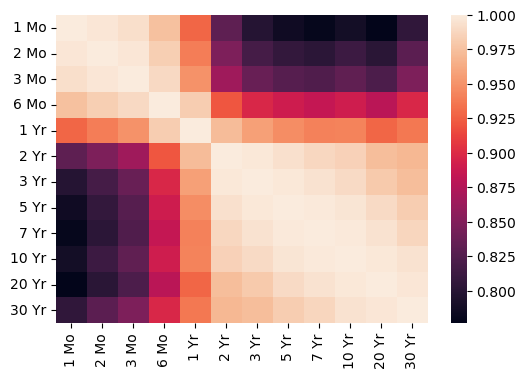

In [7]:
# Correlation matrix for each columns
correlation_matrix = rates.select_dtypes(include='number').corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix)

plt.show()

### Interpretations

**Plot 1**: Longer-term bonds like the 30-year had the highest interest rates, while short-term rates changed more often.

**Plot 2**: Short-term rates moved closely together and showed strong positive relationships.

**Plot 3**: The 2-month and 3-month rates had a clear upward trend and similar distributions.

**Plot 4**: Most rates were strongly connected, especially the longer-term ones, as shown by the dark red colors.

## part 2: Titanic

You can load the titanic data in seaborn `titanic = sns.load_dataset('titanic')`

In [8]:
titanic = sns.load_dataset('titanic')

### select only the four columns: ['survived','sex', 'age', 'class']

In [9]:
titanic = titanic[['survived', 'sex', 'age', 'class']]

In [10]:
titanic

,survived,sex,age,class
0,0,male,22.0,Third
1,1,female,38.0,First
2,1,female,26.0,Third
3,1,female,35.0,First
4,0,male,35.0,Third
...,...,...,...,...
886,0,male,27.0,Second
887,1,female,19.0,First
888,0,female,NaN,Third
889,1,male,26.0,First


### Use countplot to show the survived count of male and female:

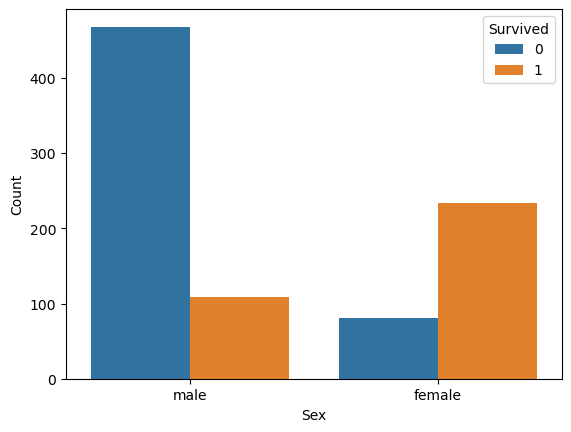

In [11]:
# Counterplot of survived, 0 means not survived and 1 means survived
sns.countplot(x='sex', hue='survived', data=titanic)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')

plt.show()

### Display the age distribution between survived and not survived in violinplot

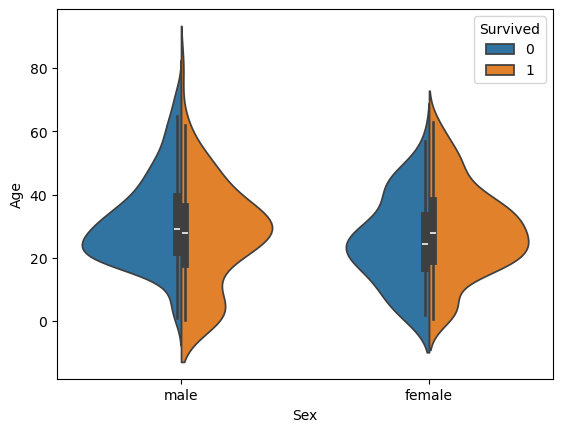

In [12]:
# Violine plot of the age dustribution of survived by sex
sns.violinplot(x='sex', y='age', hue='survived', data=titanic, split=True)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived')

plt.show()

### compare the age distribution for each class and split by survival status.

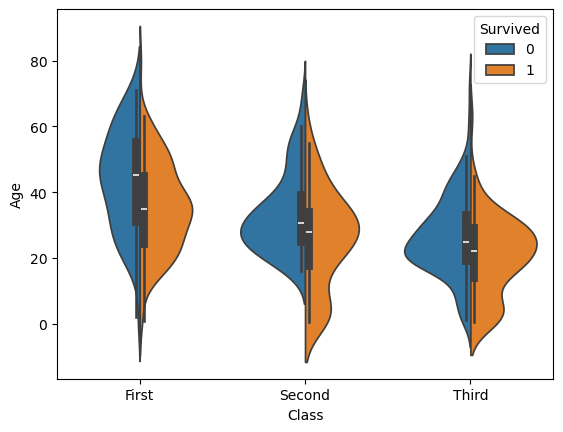

In [13]:
# Violine plot of the age dustribution of survived by class
sns.violinplot(x='class', y='age', hue='survived', data=titanic, split=True)
plt.xlabel('Class')
plt.ylabel('Age')
plt.legend(title='Survived')

plt.show()

### inspect the age distribution between male and female using boxplot.

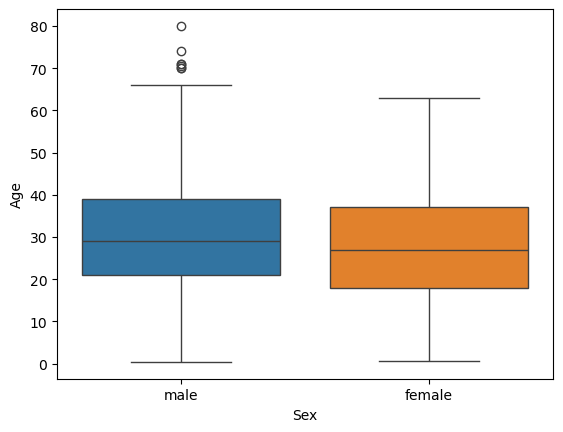

In [14]:
# Boxplot of the age distribution by sex
sns.boxplot(data=titanic, x='sex', y='age', hue='sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

### Observations or insights

**Plot 1**: More women survived than men.

**Plot 2**: Younger passengers were more likely to survive, especially among females.

**Plot 3**: Survival chances varied by class, with younger Third-class passengers surviving more often.

**Plot 4**: Men and women had slightly different age ranges, with some clear outliers.